## Pauta Tarea 2

Comenzamos importando las librerías que usaremos en el dearrollo de esta tarea. 

In [76]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as plt

Primero, importamos la tabla de excel a Python. 

In [263]:
matriz= pd.read_excel("DatosTSM.xlsx", header=None)

Ahora extraemos los datos.

In [267]:
lista = [] # Esta lista guardaremos los datos de todos los años
listayear = []  # En esta guardaremos los datos de un año en particular
year = 2009 # El primer año es 2009
for i in range(120):  # Recorremos las  filas
    # Verificamos que el año es el que estamos completando actuamente
    if(year == int(matriz.iloc[i+3,0])): 
        # Verificamos que tengamos un dato válido (que no sea S.I.)
        if(matriz.iloc[i+3,4] != "S.I."):
            # En cuyo caso, lo agregamos a la listsa listyear
            listayear.append(float(matriz.iloc[i+3,4]))
    # Si cambió el año
    else:
        # Significa que la lista del año anterior está lista, 
        # Por lo que la agregamos completamente a la lista
        lista.append(listayear)
        # Volvemos a reinicializar listayear
        listayear = []
        # Le agregamos el primer dato del nuevo año
        listayear.append(float(matriz.iloc[i+3,4]))
        # Y actualizamos el año actual
        year = year+1
# Agregamos el último año leido
lista.append(listayear)    

# Ahora calculamos el promedio anual.
# Guardamos los valores en la variable listaTSManual
listaTSManual = []
for i in range(10):
    # Calculamos el promedio del i-ésimo año y lo agregamos a la lista
    listaTSManual.append([i,np.array(lista[i]).mean()])

# Mostramos los datos solicitados como matriz de SymPy
Datos = sp.Matrix(listaTSManual)
display(Datos)

Matrix([
[0, 13.4666666666667],
[1, 13.2333333333333],
[2, 13.5166666666667],
[3,           13.675],
[4, 13.5666666666667],
[5, 13.2909090909091],
[6, 14.2333333333333],
[7,           14.175],
[8, 14.0333333333333],
[9, 13.5083333333333]])

Una vez que tenemos los datos, construimos la matriz de coeficientes y el vector de términos independientes del sistema. 

In [268]:
# Usamos el comando vander de numpy para construir la matriz
# que representa el polinomio de interpolación evaluado en los puntos
# de 1 a 10. Observar que el orden de las columnas es distinto a la
# del enunciado.
V = np.vander(range(1,11))
# Transformamos la matriz en una matriz de SymPy
B = sp.Matrix(V)
# Y luego reordenamos las columnas para que tenga el mismo aspecto
# que en el enunciado. 
A = B.copy()
for i in range(10):
    A[:,i] = B[:,9-i]
# Mostramos la matriz de coeficientes
display(A)

Matrix([
[1,  1,   1,    1,     1,      1,       1,        1,         1,          1],
[1,  2,   4,    8,    16,     32,      64,      128,       256,        512],
[1,  3,   9,   27,    81,    243,     729,     2187,      6561,      19683],
[1,  4,  16,   64,   256,   1024,    4096,    16384,     65536,     262144],
[1,  5,  25,  125,   625,   3125,   15625,    78125,    390625,    1953125],
[1,  6,  36,  216,  1296,   7776,   46656,   279936,   1679616,   10077696],
[1,  7,  49,  343,  2401,  16807,  117649,   823543,   5764801,   40353607],
[1,  8,  64,  512,  4096,  32768,  262144,  2097152,  16777216,  134217728],
[1,  9,  81,  729,  6561,  59049,  531441,  4782969,  43046721,  387420489],
[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]])

La matriz de términos independientes se obtiene simplemente tomando la segunda columna de la matriz de Datos.

In [270]:
Y = Datos[:,1]
display(Y)

Matrix([
[13.4666666666667],
[13.2333333333333],
[13.5166666666667],
[          13.675],
[13.5666666666667],
[13.2909090909091],
[14.2333333333333],
[          14.175],
[14.0333333333333],
[13.5083333333333]])

### Pregunta 1:

Verificamos primero que la matriz es invertible:

In [135]:
A.det() # Calculamos el determinante

1834933472251084800000

Como el determinante es distinto de cero, tenemos que la matriz es invertible. 

Resolvemos entonces el sistema multiplicando la inversa de $A$ por $Y$. 

In [272]:
display(A.inv()*Y)

Matrix([
[     114.075757575757],
[    -277.392873075995],
[     306.998745415463],
[    -182.790043523862],
[     65.3184015940654],
[    -14.6455641922699],
[     2.07340672348483],
[    -0.17967313261584],
[  0.00868869122775378],
[-0.000179408586526642]])

### Pregunta 2:

Resolvemos ahora el sistema usando el método de Gauss.

In [284]:
# Primero onstruimos la matriz aumentada, que llamamos Z, 
# agregando Y como una columa a la matriz A.
Z = A.col_insert(11,Y)

# Ahora usamos el comando de sympy para obtener con SymPy la forma
# escalonada reducida de la matriz Z. 
S = Z.rref()[0]
display(S)

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0,      114.075757575757],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0,     -277.392873075997],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0,      306.998745415463],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0,     -182.790043523862],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0,      65.3184015940654],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0,     -14.6455641922699],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0,      2.07340672348484],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0,     -0.17967313261584],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0,   0.00868869122775369],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -0.000179408586526641]])

La última columna es el vector solución obtenido con el metodo de Gauss-Jordan

In [286]:
S[:,10]

Matrix([
[     114.075757575757],
[    -277.392873075997],
[     306.998745415463],
[    -182.790043523862],
[     65.3184015940654],
[    -14.6455641922699],
[     2.07340672348484],
[    -0.17967313261584],
[  0.00868869122775369],
[-0.000179408586526641]])

### Pregunta 3

En esta pregunta buscamos resolver el sistema con el método de Jacobi. 

Primero, separamos la daigonal del resto de la matriz. Llamamos $D$ la matriz que contiene la diagonal y $R$ la que tiene todo el resto.

In [308]:
D = sp.Matrix(np.diag(np.diag(A)))
display(D)
R = A-D
display(R)

Matrix([
[1, 0, 0,  0,   0,    0,      0,       0,        0,          0],
[0, 2, 0,  0,   0,    0,      0,       0,        0,          0],
[0, 0, 9,  0,   0,    0,      0,       0,        0,          0],
[0, 0, 0, 64,   0,    0,      0,       0,        0,          0],
[0, 0, 0,  0, 625,    0,      0,       0,        0,          0],
[0, 0, 0,  0,   0, 7776,      0,       0,        0,          0],
[0, 0, 0,  0,   0,    0, 117649,       0,        0,          0],
[0, 0, 0,  0,   0,    0,      0, 2097152,        0,          0],
[0, 0, 0,  0,   0,    0,      0,       0, 43046721,          0],
[0, 0, 0,  0,   0,    0,      0,       0,        0, 1000000000]])

Matrix([
[0,  1,   1,    1,     1,      1,       1,        1,         1,         1],
[1,  0,   4,    8,    16,     32,      64,      128,       256,       512],
[1,  3,   0,   27,    81,    243,     729,     2187,      6561,     19683],
[1,  4,  16,    0,   256,   1024,    4096,    16384,     65536,    262144],
[1,  5,  25,  125,     0,   3125,   15625,    78125,    390625,   1953125],
[1,  6,  36,  216,  1296,      0,   46656,   279936,   1679616,  10077696],
[1,  7,  49,  343,  2401,  16807,       0,   823543,   5764801,  40353607],
[1,  8,  64,  512,  4096,  32768,  262144,        0,  16777216, 134217728],
[1,  9,  81,  729,  6561,  59049,  531441,  4782969,         0, 387420489],
[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000,         0]])

El metodo de Jacobi comienza con un vector $x_0$ arbitrario, y busca aproximarse a la solución repitiendo:

$$x_{n+1} = D^{-1}(b - Rx_n)$$

En nuestro caso vamos a comenzar con un vector de ceros.

In [322]:
def metodo_jacobi(x,D,R,b,num_repeticiones):
    for i in range(num_repeticiones):
        x = np.dot(np.linalg.inv(D),b - np.dot(R,x))
    return x

In [323]:
x = np.zeros([10,1])
D = np.array(D,dtype=float)
R = np.array(A-D,dtype=float)
b = np.array(Y,dtype=float)

display(metodo_jacobi(x,D,R,b,100))

array([[-1.68441167e+58],
       [-3.13326298e+58],
       [-2.24700594e+58],
       [-9.28090156e+57],
       [-2.59286114e+57],
       [-5.33034791e+56],
       [-8.48880098e+55],
       [-1.08488832e+55],
       [-1.14260064e+54],
       [-1.01290351e+53]])

Obtenemos que la solución diverge. Basta aumentar el valor de `num_repeticiones` para obtener un vector de valores cada vez más grandes. 

Esto es independiente del punto inicial seleccionado. Por ejemplo si tomamos la solución obteneida en la pregunta anterior, vemos que de todas maneras el método diverge.

In [324]:
x = S[:,10]
display(metodo_jacobi(x,D,R,b,100))

array([[3.04797984500562e+45],
       [5.66970806496132e+45],
       [4.06600651563291e+45],
       [1.67939948891880e+45],
       [4.69183909703059e+44],
       [9.64538142142371e+43],
       [1.53606715169962e+43],
       [1.96312921032683e+42],
       [2.06756091372521e+41],
       [1.83287111207066e+40]], dtype=object)

Una explicación para esto es que se requiere que el radio expectral de la matriz $D^{-1}R$ tiene que ser menor que uno. El siguiente código calcula el radio espectral de esta matriz:

In [329]:
Q = np.dot(np.linalg.inv(D),R)
Q = np.array(Q,dtype=float)
radio = np.abs(np.linalg.eig(Q)[0]).max()
display(radio)

3.9364763840615336

### Pregunta 4

En esta pregunta queremos calcular el número de condicionamiento de la matriz de coeficientes, que se define como la norma de la matriz, multiplicada por la norma de la inversa de la matriz. 

In [330]:
float(A.norm()*A.inv().norm())

2106810260520.9841

Obtenemos que el numero de condicionamiento de la matriz es muy grande, lo que podría explicar por qué el método de Jacobi no converge. 

### Pregunta 5

Graficamos el polynomio de interpolación para ver que efectivamente coincide con los puntos dados:¡ (usamos la solución calculada con Gauss-Jordan).

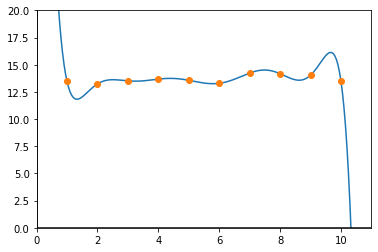

In [352]:
from pylab import *
from matplotlib import pyplot
# Polinomio
def polynomio(coef,x):
    return np.polyval(coef,x)
# Puntos
coef = np.flip(np.array(S[:,10],dtype=float))
y=b
z=[0]
# Valores del eje X que toma el gráfico.
x = arange(-1, 11, 0.05)
# Graficar ambas funciones.
pyplot.plot(x, [polynomio(coef,i) for i in x])
pyplot.plot(range(1,11),y, 'o')
pyplot.plot(z, 'o', color="white")
# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
# Limitar los valores de los ejes.
pyplot.xlim(0, 11)
pyplot.ylim(0, 20)
# Guardar gráfico como imágen PNG.
pyplot.savefig("output.png")
# Mostrarlo.
pyplot.show()

Vemos que la utilidad de este polinomio es extremadamente limitada para obtener predicciones sobre los valores fuera del rango dado, ya que la función rápidamente diverge. 